### Notes

1. Script runLagranto runs lagranto backwards.  
2. To create a start file, use create_startf. Here, startf is created from a region. The region is defined in regionf. Syntax is region.eq(2,30) @ profile(100,80,15) @hPa,agl. 30 is the step-size in km. The syntax for create_startf is time filename.
3. Trajectories are determined using caltra
4. Tracing meteorological variables is done with trace.  The actual variables are specified in tracevars. Syntax is

Trace definition format

|var | scale| calculate?| file type|
  |----|------|-----|-----|
  |PS    | 1. | 0 | P |
   | Q    |1000.|  0| P|

Code is located in directory /home/grecu/lagranto/lagranto.ecmwf/cdo


In [1]:
import os
os.environ['LAGRANTO']='/home/grecu/lagranto/lagranto.ecmwf'
os.environ['LD_LIBRARY_PATH']='/home/grecu/netcdf3/lib'

cmd='../bin/create_startf 20151202_12 startf_20151202_12 "region.eqd(2,30) @ profile(100,800,15) @hPa,agl"'
os.system(cmd)
cmd='../bin/caltra 20151202_12 20151122_12 startf_20151202_12 traj2b.4   -o 360 -j'

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap, cm
import numpy as np


f=Dataset('traj2b.4','r')

x=f['lon'][:,:,:]
y=f['lat'][:,:,:]
p=f['p'][:,:,:]
q=f['Q'][:,:,:]
import glob
files=sorted(glob.glob("P2015*"))[0:42]
import sys
sys.path.append("/home/grecu/lagranto/lagranto.ecmwf/cdo")

from numpy import *
a=nonzero(p[0,0,0,:]-p[1,0,0,:]<-30)
b=nonzero(p[4,0,0,:][a]>100)
c=nonzero(p[20,0,0,:][a][b]>100)

dqdt=zeros((40,20),float)
count=zeros((40,20),float)
for i in a[0][b][c]:
    for j in range(40):
        ip=int(((p[j:j+2,0,0,i]).mean()-50)/50.)
        if ip>=0 and ip<20:
            dqdt[j,ip]+=(q[j,0,0,i]-q[j+1,0,0,i])
            count[j,ip]+=1

a=nonzero(count>0)
dqdt[a]=dqdt[a]/count[a]
dqdtm=ma.array(dqdt,mask=abs(dqdt)<0.05)
matplotlib.rcParams.update({'font.size': 20})


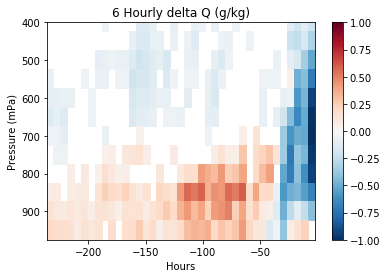

In [5]:
plt.pcolormesh(-236+arange(40)*6,25+arange(20)*50,dqdtm[::-1,:].T,cmap='RdBu_r',\
               vmin=-1,vmax=1)
plt.ylim(975,400)
plt.xlabel('Hours')
plt.ylabel('Pressure (mPa)')
plt.title('6 Hourly delta Q (g/kg)')
plt.colorbar()